In [108]:
import nltk
nltk.download('stopwords')

# https://pythonspot.com/nltk-stop-words/

[nltk_data] Downloading package stopwords to /Users/ER/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [110]:
stops = set(stopwords.words('english'))
print(stops)

{'other', "aren't", 'over', 'than', 've', 'before', 'o', 'we', 'needn', 'above', 'off', 'their', 'ours', 'is', 'were', 'doing', 'your', "wasn't", 'until', 'any', 'its', 'them', 'which', 't', 'did', "isn't", 'myself', "you'll", 'me', 'yourselves', 'now', "should've", 'and', 'will', 'just', 'not', 'couldn', 'shouldn', 'then', 'has', 'mustn', 'a', 'm', 'he', 'that', 'are', 'from', "you'd", 'into', 'those', "shan't", "won't", 'some', "couldn't", 'ma', 'does', 'to', 'or', "needn't", 'down', 'his', 'further', "you're", 'each', 'was', "don't", 'whom', 'because', 'shan', 'where', 'him', 'am', 'aren', "didn't", 'ourselves', 'below', 'how', 'more', 'hers', 'having', 'didn', "you've", 'same', 'had', 'won', 're', 'both', 'under', 'up', 'theirs', 'wasn', "mustn't", 'in', "it's", 'there', 'most', 'through', 'as', 'while', 's', 'after', 'you', 'for', 'my', 'about', 'few', "hadn't", 'an', "haven't", "that'll", 'themselves', 'out', 'once', 'all', 'her', 'ain', 'with', 'by', 'have', 'herself', 'should',

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [122]:
questions = pd.read_csv('./data/Capstone-Data - Sheet1.csv')

In [123]:
questions.head(3)

,File,message,binary: pharmacist/internist,specialty,Summary,specialty.1,Unnamed: 6
0,1-131188152.xml.txt,SUBJECT: who and where to get cetirizine - D\n MESSAGE: I need/want to know who manufscturs Cetirizine. My Walmart is looking for a new supply and are not getting the recent,pharmacist,pharmacist,Who manufactures cetirizine?,pharmacist,pharmacist
1,14348.txt,"who makes bromocriptine\n i am wondering what company makes the drug bromocriptine, i need it for a mass i have on my pituitary gland and the cost just keeps raising. i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer coupons or something to help me afford the medicine. if i buy 10 pills in which i have to take 2 times a day it costs me 78.00. and that is how i have to buy them. thanks.",pharmacist,pharmacist,Who manufactures bromocriptine?,pediatrician,internist
2,1-131985747.xml.txt,"SUBJECT: nulytely\n MESSAGE: Hello can you tell me where do i order the nulytely who is the manufacture, what phone number can i call. thanks.",pharmacist,pharmacist,"Who makes nulytely, and where can I buy it?",oncologist,dentist


In [124]:
questions.rename(columns = {'binary: pharmacist/internist': 'binary'}, inplace=True)

In [125]:
questions.head(3)

,File,message,binary,specialty,Summary,specialty.1,Unnamed: 6
0,1-131188152.xml.txt,SUBJECT: who and where to get cetirizine - D\n MESSAGE: I need/want to know who manufscturs Cetirizine. My Walmart is looking for a new supply and are not getting the recent,pharmacist,pharmacist,Who manufactures cetirizine?,pharmacist,pharmacist
1,14348.txt,"who makes bromocriptine\n i am wondering what company makes the drug bromocriptine, i need it for a mass i have on my pituitary gland and the cost just keeps raising. i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer coupons or something to help me afford the medicine. if i buy 10 pills in which i have to take 2 times a day it costs me 78.00. and that is how i have to buy them. thanks.",pharmacist,pharmacist,Who manufactures bromocriptine?,pediatrician,internist
2,1-131985747.xml.txt,"SUBJECT: nulytely\n MESSAGE: Hello can you tell me where do i order the nulytely who is the manufacture, what phone number can i call. thanks.",pharmacist,pharmacist,"Who makes nulytely, and where can I buy it?",oncologist,dentist


In [126]:
questions['binary'].value_counts()

internist     860
pharmacist    139
internists      1
Name: binary, dtype: int64

In [128]:
questions['binary'][questions['binary'] == 'internists'] = 'internist'

In [129]:
questions['binary'][questions['binary'] == 'internists']

Series([], Name: binary, dtype: object)

In [130]:
questions['binary'].value_counts()

internist     861
pharmacist    139
Name: binary, dtype: int64

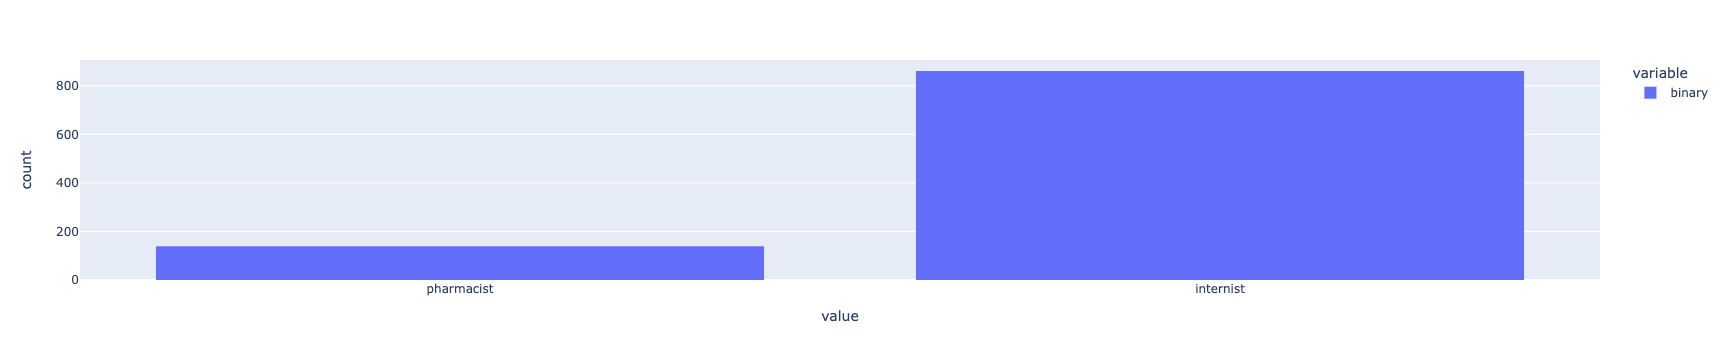

In [131]:
px.histogram(data_frame=questions['binary'])

In [132]:
questions['specialty'].value_counts()

pharmacist            139
neurologist           113
internist              87
gastroenterologist     78
orthopedist            64
pediatrician           58
obgyn                  56
dermatologist          55
cardiologist           53
oncologist             48
endocrinologist        40
urologist              36
ophthamologist         34
pulmonologist          33
infectious disease     30
ENT                    28
psychologist           18
rheumatologist         14
dentist                 8
bariatrician            7
bariaticians            1
Name: specialty, dtype: int64

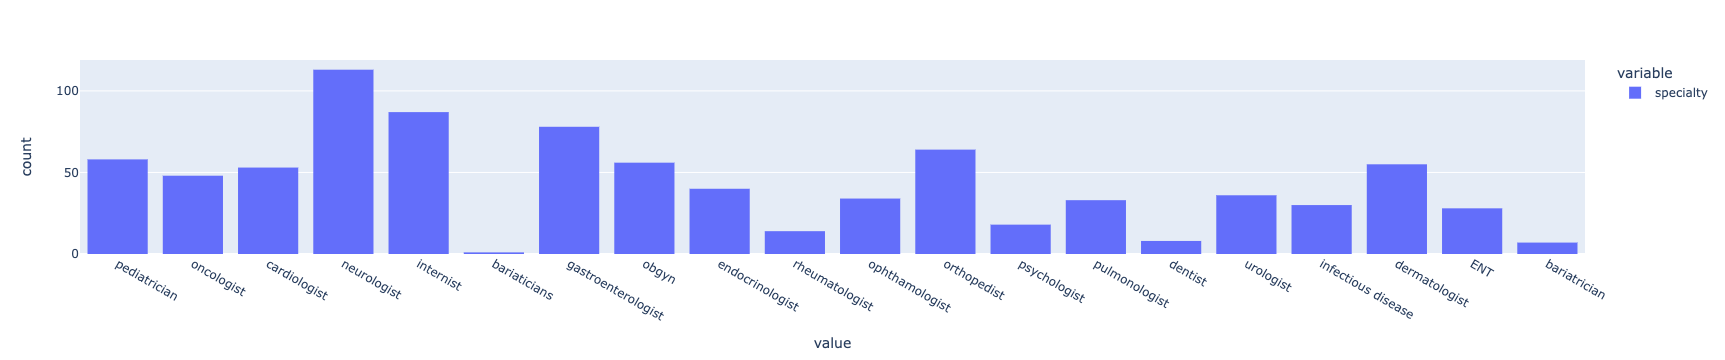

In [133]:
px.histogram(data_frame=questions['specialty'][questions['specialty'] != 'pharmacist'])

In [136]:
pd.options.display.max_colwidth = 1000

questions[['message', 'Summary', 'specialty']].iloc[[np.random.randint(0,1000)]]

,message,Summary,specialty
757,"SUBJECT: Mysthenia Gravis\n MESSAGE: hi i am 34 & a half years old, unmarried female.in 2011 i was diagnosed with MG ( early stage)when my right eyelid drooped a lot. the special blood test & enlarged thymus confirmed it. i was on prescribed medication since then till 3 months back when i discontinued the medicines assuming i am ok. but the drooping has again started though thymus is no longer enlarged ( as per latest CT scan ) so my doc has told me to continue the medicines lifelong. i am OK with it. but i dont want to pass on this disease to my kids. pls tell me if there is any way by which i can ensure that my kids dont get this disease during pregnancy? is it genetic or do the antobodies pass on from pregnant mother to the foetus? is there any way out to save the baby from this disease/ pls tell .",Is myasthenia gravis inherited and can it be passed from mother to fetus?,neurologist


In [137]:
questions[['message', 'Summary', 'specialty']].iloc[[np.random.randint(0,1000)]]

,message,Summary,specialty
254,"ClinicalTrials.gov - Question - general information. Is there any information out there regarding people who have both, Charcot Marie Tooth Disease and Parkinson's ? My husband has both. Not too much info. In [LOCATION] about these two diseases together. However, as a care giver, this is a tough one! Any studies genetically or otherwise on these two together? Thanks, [NAME]",Where can I find information on Charcot Marie Tooth Disease with Parkinson's disease?,neurologist


In [138]:
questions[['message', 'Summary', 'specialty']].iloc[[np.random.randint(0,1000)]]

,message,Summary,specialty
607,"SUBJECT: huntington's disease\n MESSAGE: Hello,\n I was wondering if the huntington's disease could be infectious; for example, can you be infected by this disease through contact in the blood of a person or animal who has this disease? I was on a tour of the animal lab today, and I got to observe dissecrion of the huntington's disease mice model. While observing it closely, a few drops of blood splashed on my face by accident, and now I'm worried that it might have went in my mouse.",How is Huntington's disease transmitted?,neurologist


In [139]:
questions[['message', 'Summary', 'specialty']].iloc[[np.random.randint(0,1000)]]

,message,Summary,specialty
564,SUBJECT: Small Intestine Died\n MESSAGE: My Father-in-law died recently after his Small intestine died. He was apparently in good health and ate dinner on Saturday and had to be rushed to the hospital on Sunday. Early on Tuesday they operated on him after his blood pressure dropped. They removed 70-80% of his small intestine and part of his large intestine (dead). Is this reasonable that they would find this % of his intestine dead -- again he appeared to be OK the day before.,What causes the small intestine to die and what are the symptoms?,gastroenterologist


In [141]:
questions['message_word_count'] = [len(i.split()) for i in questions['message']]

In [146]:
questions.sort_values(by='message_word_count', ascending=False).head(5)

,File,message,binary,specialty,Summary,specialty.1,Unnamed: 6,message_length,message_word_count
714,1-135983184.xml.txt,"Hi All,\n I am from India and really worried.\n I have a 6 months old baby girl. I have read the article on Lactose intolerance. She is unable to digest any formula milk or any milk products. When she was a new born, I started giving her Lactogen (a formula milk) a little bit along with my milk. She was fine with it but after 3 weeks, I switched her to another formula milk named Nan Pro 0 which is for babies upto 1 year. She started drinking that along with my breast milk. After 2 weeks, she started getting Diarrhea and a severe one where she pooped at least 15 times in one day. Therefore, I consulted the doctor and the doctor immediately asked me to put her on breast milk only. I did try that but she was hungry and crying therefore, I gave her a little bit of formula milk aswell. She was file with all the medicines. However, once the medicine stooped, she again started getting diarrhea. This continued on and off.\n After a while, the doctor asked me to stop the formula milk and st...",internist,pediatrician,Where can I get help for my 6 months old baby girl with Lactose intolerance in India?,NaN,NaN,1997,378
642,11199.txt,"ClinicalTrials.gov - Question - general information.\n Hello, \n My name is [NAME],I am 30 years old and I am from [LOCATION]. I met my friend [NAME] on a chat room. [NAME] is 25 years old and he currently lives in [LOCATION], Algeria. His dad died, his brother died 2 years ago in a motorcycle accident and about 9 months ago my dear friend got into a car accident. In that car accident he suffered a T-6 and T-7 fracture which cause him to be paralyzed from his waist down. He is so young and it really hurts how much he has suffered in his short life. Not only him, but just thinking how much his mom has suffered it really breaks my heart. I asked him how or what can I do to help him, he did not asked for money or something like, he just said: ""Would you help me to research how to get cured?"". Since I met my friend there is no one day I have stopped thinking in what can I do to make his dream come true. I know we lives in an imperfect world and things happen to people but faith moves ...",internist,neurologist,Where can I get information about treatment for T-6 and T-7 fracture paraplegia?,NaN,NaN,1826,348
640,1-132048350.xml.txt,"Hello.\n I am writing this mail from [LOCATION]. This in regards with seeking help for\n Ulceratice colitis.\n My mother is suffering from this diseases from last 3 Years. Her treatment\n is going with [LOCATION] from past a\n year and half.\n Below are the symptoms of her disease :\n 1. Mucas Pus flow in quantity while passing stool\n 2. Blood flow while passing stool\n 3. Heavy weakness\n 4. Heavy and steady weight loss\n 5. Weak Eyesight\n 6. Heavy cramps after meal\n 7. stomach pain sometimes after lifting heavy weight\n 8. Poor appetite\n Below are the medicines given by the doctor during the course :\n Cap SonprazD, Tab Coolgut 1.5 , tab Falute, Mesacol Supporteries, Cap A to\n Z , Tab siho fix, and Tab omnacortil , rabelco rd cap , coolgut , folvitc ,\n entofoam , bevon , anovate.\n She had undergone Colonoscopy , Endoscopy , Stool test , Urine tests and\n Blood test many times ( i can mail the reports of all the above if needed\n ). Her progress was very good at initial sta...",internist,gastroenterologist,Where can I get advice and help for ulceratice colitis?,NaN,NaN,1946,341
802,12800.txt,"I understand that you cannot provide opinions,nor suggest, any type of therpy. \n My son (dob-[DATE]), was called back to the hospital four days after birth due to a abnormal PKU, which suggested adrenal hyperplasia. After test the endocrine physians felt he did not have the condition. Several years later he began having severe headaches preceded by violent vomiting epidodes \n that lasted for hours. When he was admitted to [LOCATION], he was suffering from bleeding e

In [147]:
questions.sort_values(by='message_word_count', ascending=False).tail(5)

,File,message,binary,specialty,Summary,specialty.1,Unnamed: 6,message_length,message_word_count
577,38.txt,cinca sindrome. where the treatment of cinca sindrome.,internist,pediatrician,What are the tratments for cinca syndrome?,NaN,NaN,54,8
946,5566.txt,Cross Eye.\n Need to fix my cross eyed,internist,ophthamologist,How to treat crossed eyes?,NaN,NaN,38,8
611,78.txt,are jumping genes[transposons] associated with lynch syndrome? [NAME],internist,oncologist,Are jumping genes [transposons] associated with Lynch syndrome?,NaN,NaN,69,8
827,11352.txt,erection problems.\n how to get rid of erections?,internist,urologist,What are the treatments for erection problems?,NaN,NaN,49,8
759,11947.txt,bile.\n because reason vomit bile?,internist,gastroenterologist,What causes vomiting bile?,NaN,NaN,34,5


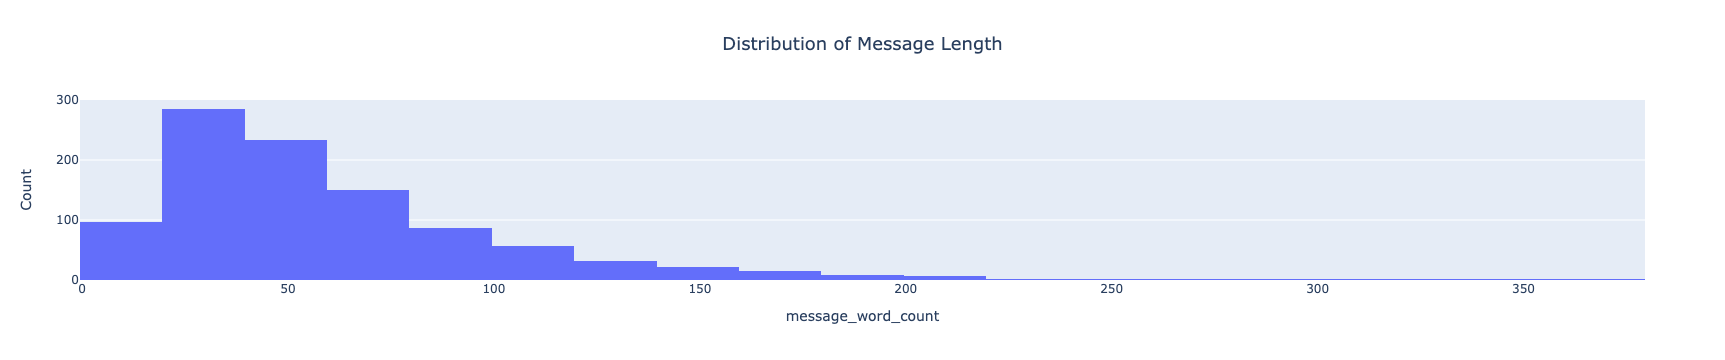

In [150]:
fig = px.histogram(data_frame=questions,
             x='message_word_count',
             nbins=25,
             title='Distribution of Message Length',
             labels={'status_length' : 'Message Length by Word Count'}
            )

fig.update_yaxes(title = 'Count')

fig.update_layout(title_font_size=18, title_x=.5)

In [61]:
df_vec = questions[['message', 'binary']]

In [62]:
df_vec.head(3)

,message,binary
0,SUBJECT: who and where to get cetirizine - D\n MESSAGE: I need/want to know who manufscturs Cetirizine. My Walmart is looking for a new supply and are not getting the recent,pharmacist
1,"who makes bromocriptine\n i am wondering what company makes the drug bromocriptine, i need it for a mass i have on my pituitary gland and the cost just keeps raising. i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer coupons or something to help me afford the medicine. if i buy 10 pills in which i have to take 2 times a day it costs me 78.00. and that is how i have to buy them. thanks.",pharmacist
2,"SUBJECT: nulytely\n MESSAGE: Hello can you tell me where do i order the nulytely who is the manufacture, what phone number can i call. thanks.",pharmacist


In [63]:
df_vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  1000 non-null   object
 1   binary   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [115]:
cv = CountVectorizer(stop_words=stops)

In [116]:
dfqu_vec = pd.DataFrame(cv.fit_transform(df_vec['message']).A, columns=cv.get_feature_names_out())
dfqu_vec.head(3)

,00,000,000421,001274,00527172874,01,01d08e1e,01t11,02,03,...,zerolac,zest,zinc,zolmitriptan,zostavax,évidence,úlcera,ımportant,ınformatıon,ıs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
dfqu_vec.sum().sort_values(ascending=False).head(15)

message        730
subject        665
name           354
help           334
please         254
know           228
would          227
years          217
information    193
thank          180
treatment      171
old            169
location       160
need           155
get            151
dtype: int64

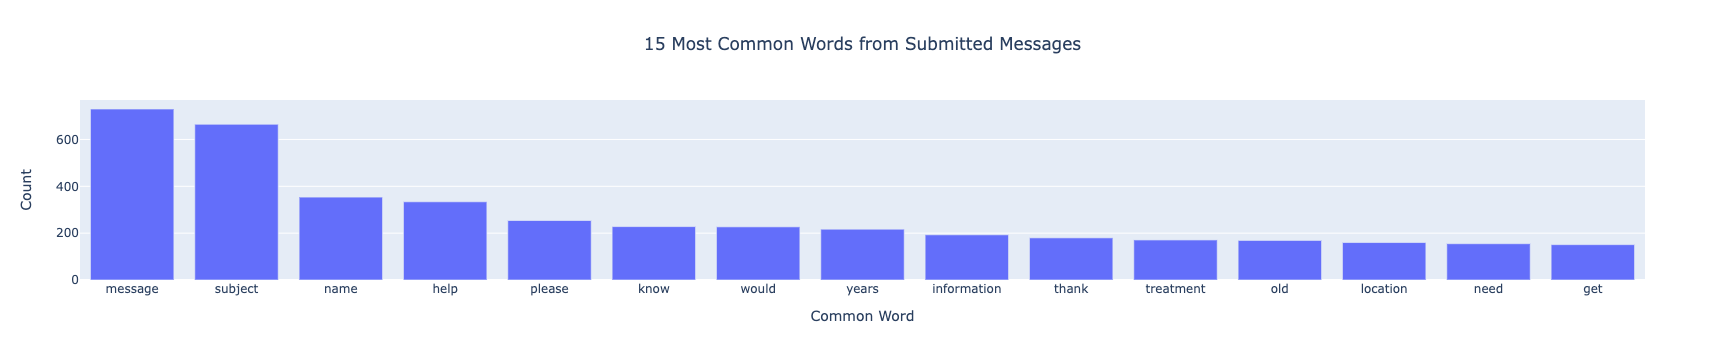

In [153]:
freq = dfqu_vec.sum().sort_values(ascending=False).head(15)

bar_freq = px.bar(
                  x=list(freq.index),
                  y=list(freq.values),
                  title='15 Most Common Words from Submitted Messages',
                  labels = {'y': 'Count', 'x': 'Common Word'}

)

bar_freq.update_layout(title_x = 0.5)

In [159]:
dfqu_vec['col'] = range(0,1000)
dfqu_vec.head(3)

,00,000,000421,001274,00527172874,01,01d08e1e,01t11,02,03,...,zest,zinc,zolmitriptan,zostavax,évidence,úlcera,ımportant,ınformatıon,ıs,col
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [160]:
questions['col'] = range(0,1000)
questions.head(3)

,File,message,binary,specialty,Summary,specialty.1,Unnamed: 6,message_length,message_word_count,col
0,1-131188152.xml.txt,SUBJECT: who and where to get cetirizine - D\n MESSAGE: I need/want to know who manufscturs Cetirizine. My Walmart is looking for a new supply and are not getting the recent,pharmacist,pharmacist,Who manufactures cetirizine?,pharmacist,pharmacist,172,31,0
1,14348.txt,"who makes bromocriptine\n i am wondering what company makes the drug bromocriptine, i need it for a mass i have on my pituitary gland and the cost just keeps raising. i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer coupons or something to help me afford the medicine. if i buy 10 pills in which i have to take 2 times a day it costs me 78.00. and that is how i have to buy them. thanks.",pharmacist,pharmacist,Who manufactures bromocriptine?,pediatrician,internist,473,97,1
2,1-131985747.xml.txt,"SUBJECT: nulytely\n MESSAGE: Hello can you tell me where do i order the nulytely who is the manufacture, what phone number can i call. thanks.",pharmacist,pharmacist,"Who makes nulytely, and where can I buy it?",oncologist,dentist,141,25,2


In [179]:
df_all = pd.merge(left = dfqu_vec, right = questions[['binary', 'col']], how = 'left', left_on = 'col', right_on = 'col')
df_all.head(3)

,00,000,000421,001274,00527172874,01,01d08e1e,01t11,02,03,...,zinc,zolmitriptan,zostavax,évidence,úlcera,ımportant,ınformatıon,ıs,col,binary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,pharmacist
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,pharmacist


In [184]:
df_all.drop(columns='col', inplace=True)
df_all.head(3)

,00,000,000421,001274,00527172874,01,01d08e1e,01t11,02,03,...,zest,zinc,zolmitriptan,zostavax,évidence,úlcera,ımportant,ınformatıon,ıs,binary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist


In [185]:
df_all[df_all['binary'] == 'pharmacist'].head(3)

,00,000,000421,001274,00527172874,01,01d08e1e,01t11,02,03,...,zest,zinc,zolmitriptan,zostavax,évidence,úlcera,ımportant,ınformatıon,ıs,binary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist


/var/folders/3x/mhg15qwn5vs8792nlh38tg080000gn/T/ipykernel_37056/3429303352.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



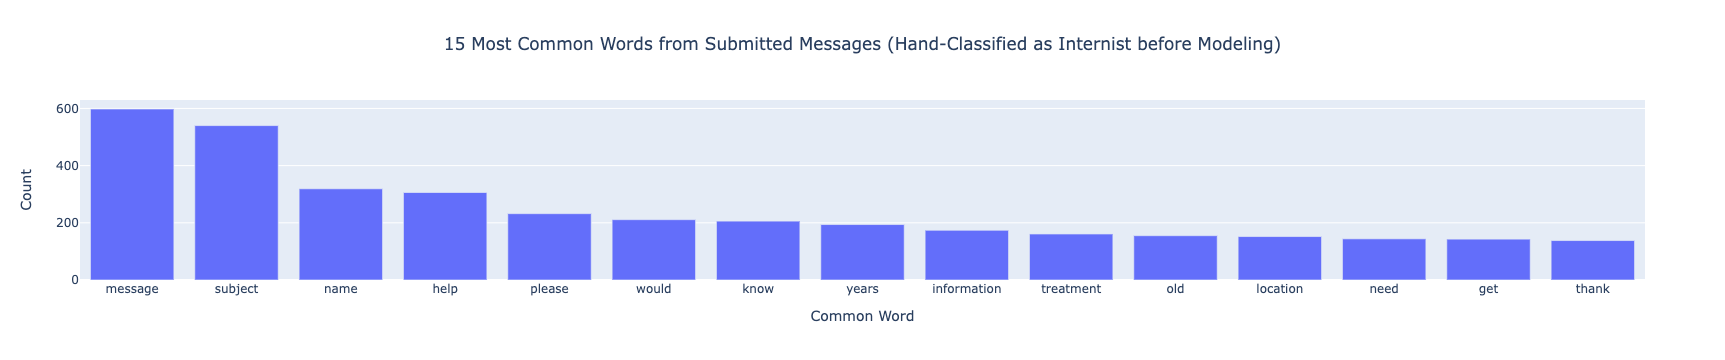

In [189]:
internist = df_all[df_all['binary'] == 'internist']
internist.drop(columns='binary', inplace=True)
freq1 = internist.sum().sort_values(ascending=False).head(15)

bar_freq1 = px.bar(
                  x=list(freq1.index),
                  y=list(freq1.values),
                  title='15 Most Common Words from Submitted Messages (Hand-Classified as Internist before Modeling)',
                  labels = {'y': 'Count', 'x': 'Common Word'}

)

bar_freq1.update_layout(title_x = 0.5)

/var/folders/3x/mhg15qwn5vs8792nlh38tg080000gn/T/ipykernel_37056/100744022.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



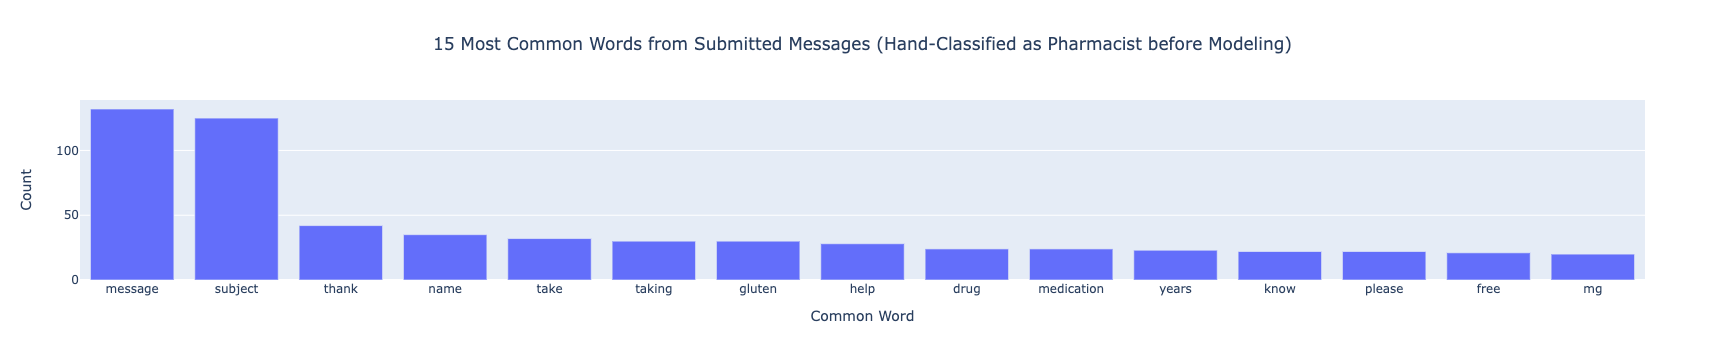

In [190]:
pharmacist = df_all[df_all['binary'] == 'pharmacist']
pharmacist.drop(columns='binary', inplace=True)
freq2 = pharmacist.sum().sort_values(ascending=False).head(15)

bar_freq2 = px.bar(
                  x=list(freq2.index),
                  y=list(freq2.values),
                  title='15 Most Common Words from Submitted Messages (Hand-Classified as Pharmacist before Modeling)',
                  labels = {'y': 'Count', 'x': 'Common Word'}

)

bar_freq2.update_layout(title_x = 0.5)

In [195]:
df_all.head(3)

,00,000,000421,001274,00527172874,01,01d08e1e,01t11,02,03,...,zest,zinc,zolmitriptan,zostavax,évidence,úlcera,ımportant,ınformatıon,ıs,binary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pharmacist


In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_all['binary_pharm_1'] = pd.DataFrame(le.fit_transform(df_all['binary']), columns=['binary'])
df_all.head(3)

,00,000,000421,001274,00527172874,01,01d08e1e,01t11,02,03,...,zinc,zolmitriptan,zostavax,évidence,úlcera,ımportant,ınformatıon,ıs,binary,binary_pharm_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,pharmacist,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,pharmacist,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,pharmacist,1


In [198]:
X = df_all.drop(columns=['binary', 'binary_pharm_1'])
y = df_all['binary_pharm_1']

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, stratify=y)

In [205]:
y_train.value_counts(normalize=True)

0    0.861333
1    0.138667
Name: binary_pharm_1, dtype: float64

In [200]:
lg = LogisticRegression()

In [206]:
lg.fit(X_train, y_train)

LogisticRegression()

In [208]:
lg.score(X_train, y_train)

1.0

In [207]:
lg.score(X_test, y_test)

0.904

In [209]:
lg.coef_

array([[ 0.07721709, -0.09796256, -0.00405691, ..., -0.0017304 ,
        -0.0017304 , -0.0034608 ]])

In [211]:
conv_odds = pd.DataFrame(np.exp(lg.coef_[0]), index=lg.feature_names_in_, columns = ['coef_val'])
conv_odds.sort_values(by='coef_val', ascending=True).head(25)

,coef_val
get,0.556304
disease,0.559706
problem,0.561838
surgery,0.566939
shingles,0.585324
syndrome,0.593677
back,0.598294
would,0.600460
location,0.615539
treatment,0.617064


In [212]:
conv_odds.sort_values(by='coef_val', ascending=True).tail(25)

,coef_val
product,1.790490
gelatin,1.794663
reactions,1.797988
instructions,1.809554
lower,1.829187
day,1.838817
glucosamine,1.844391
effects,1.854675
new,1.860582
topical,1.941120
